# Atividade 4

**Objetivo:**  
Desenvolver um programa em Python para *calcular as frequências naturais de vibração e os modos normais (deslocamentos relativos) de uma cadeia atômica finita com 2, 3 e 4 átomos*, incluindo interações com vizinhos mais distantes (segunda vizinhança) no último caso.

 
**Instruções:**
- Cadeia linear com 2 massas:  
    - Modele uma cadeia com duas massas $m_1$ e $m_2$ conectadas por uma mola de constante $k$.
    - Ambas as extremidades são livres (não ligadas a paredes).
    - Estude os efeitos da diferença entre $m_1$ e $m_2$ nas frequências e nos deslocamentos relativos.  

- Extensão para 3 massas:  
    - Conecte três massas em linha com molas entre elas.
    - Varie as massas e analise o comportamento vibracional do sistema.
    - Mantenha as extremidades livres.

- Extensão para 4 massas com inclusão de segunda vizinhança:  
    - Agora, modele uma cadeia com quatro massas $m_1$, $m_2$, $m_3$, $m_4$, conectadas por molas com constante $k$ entre vizinhos imediatos.
    - Adicione molas adicionais conectando pares de massas a duas posições de distância:
        - Entre $m_1$ e $m_3$;
        - Entre $m_2$ e $m_4$.
    - Use uma constante $k’$ para as molas de segunda vizinhança (ex: $k’ = 0.2k, 0.5k,$ etc.).

**Análise:**
- Como a presença de segunda vizinhança altera as frequências naturais
- Quais modos normais são mais afetados por essas interações adicionais.  
 

**Visualizações Recomendadas:**
- Gráficos das frequências naturais para cada configuração;
- Visualização dos modos normais (vetores de deslocamento);
- Comparação entre o caso com e sem interações de segunda vizinhança para 4 átomos.

**Entrega Esperada:**
- Código funcional e bem comentado
- Gráficos claros dos resultados
-Texto explicativo (até 300 palavras) discutindo:
    - O efeito da variação das massas;
    - O impacto da inclusão de segundos vizinhos;
    - A interpretação física das modificações observadas nos modos.

###### 

In [2]:
!pip install vpython
import matplotlib.pyplot as plt
import numpy as np
from vpython import *
import math as math
from scipy.linalg import eigh

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
   -------------------------------------- - 3.4/3.6 MB 18.3 MB/s eta 0:00:01
   ---------------------------------------- 3.6/3.6 MB 16.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/667.0 kB ? eta -:--:--
   --------------------------------------- 667.0/667.0 kB 25.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ------------------------- -------------- 3.4/5.3 MB 16.7 MB/s eta 0:00:01
   ---------------------------------------- 5.3/5.3 MB 14.5 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


<IPython.core.display.Javascript object>

## Casos particulares para 2, 3 e 4 massas com e sem $2^a$ vizinhança

$D_{j,j\pm 1} = \frac{-K_{j,j\pm 1}}{m_j}$, $\hspace{1cm}$   $D_{j, j} = \frac{K_{j, j-1} + K_{j, j+1}}{m_j}$

### D para n = 2

In [58]:
k, m1, m2 = 0.1, 1, 1 #constantes genéricas

M2 = np.vstack([
    np.full(2, 1/m1),
    np.full(2, 1/m2)])


D2 = np.array([[k/m1, -k/m1],
              [-k/m2, k/m2]])
valor, vetor = eigh(D2)
print(f"Matriz D: \n{D2} \n \nFrequências: {valor} \n \nModos normais: \n{vetor}")

Matriz D: 
[[ 0.1 -0.1]
 [-0.1  0.1]] 
 
Frequências: [0.  0.2] 
 
Modos normais: 
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


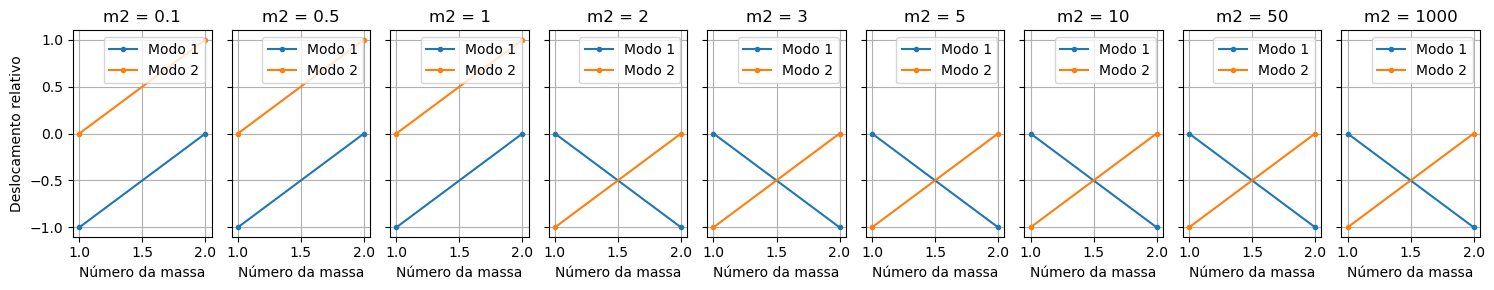

In [97]:
k, m1 = 0.1, 1
m2_var = [0.1, 0.5, 1, 2, 3, 5, 10, 50, 1000]

fig, axs = plt.subplots(1, len(m2_var), figsize=(15, 3), sharey=True)
for idx, m2 in enumerate(m2_var):
    D2 = np.array([[k/m1, 0],
                   [0, k/m2]])
    valor, vetor = eigh(D2)
    for i in range(vetor.shape[1]):
        axs[idx].plot(range(1, vetor.shape[0]+1), vetor[:, i], '.-', label=f'Modo {i+1}')
    axs[idx].set_title(f"m2 = {m2}")
    axs[idx].set_xlabel('Número da massa')
    axs[idx].grid(True)
    if idx == 0:
        axs[idx].set_ylabel('Deslocamento relativo')
    axs[idx].legend()

plt.tight_layout()
plt.show()

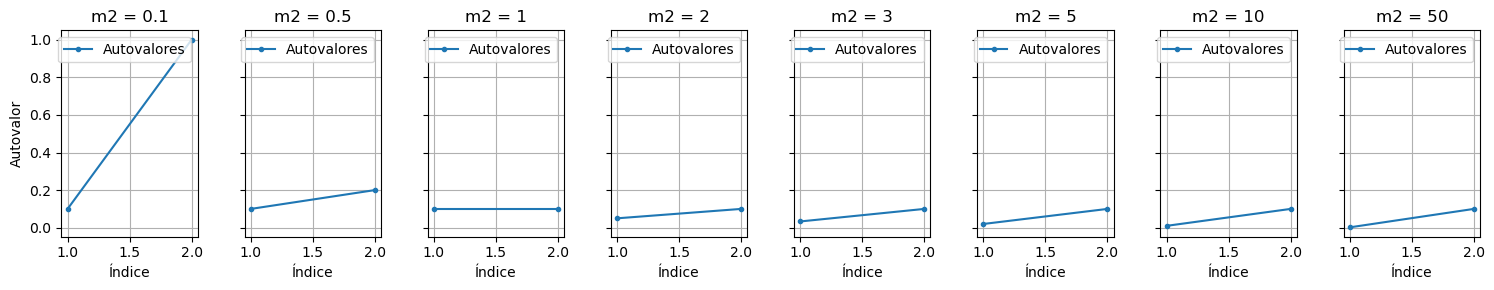

In [98]:
k, m1 = 0.1, 1
m2_var = [0.1, 0.5, 1, 2, 3, 5, 10, 50]

fig, axs = plt.subplots(1, len(m2_var), figsize=(15, 3), sharey=True)
for idx, m2 in enumerate(m2_var):
    D2 = np.array([[k/m1, 0],
                   [0, k/m2]])
    valor, vetor = eigh(D2)
    axs[idx].plot(range(1, len(valor)+1), valor, '.-', label='Autovalores')
    axs[idx].set_title(f"m2 = {m2}")
    axs[idx].set_xlabel('Índice')
    axs[idx].grid(True)
    if idx == 0:
        axs[idx].set_ylabel('Autovalor')
    axs[idx].legend()

plt.tight_layout()
plt.show()


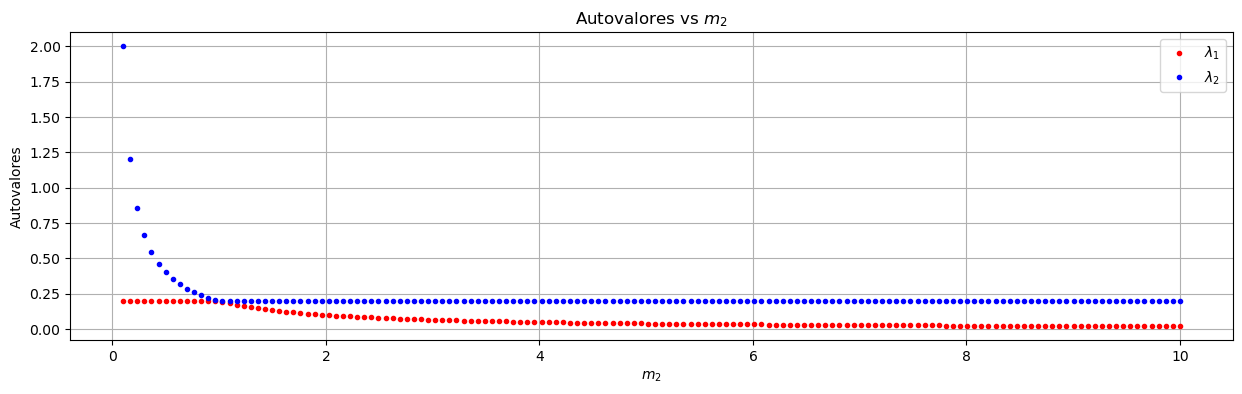

In [96]:
k = 0.2  # Constante da mola
m1 = 1.0  # Massa m1 fixa
m2_values = np.linspace(0.1, 10, 150)  # Varia m2

w_var = []

for m2 in m2_values:
    D = np.array([[k/m1, -0],
                   [0, k/m2]])
    ww, v = eigh(D)
    eigvals = np.linalg.eigvals(D)
    w_var.append(ww)

w_var = np.array(w_var)

plt.figure(figsize=(15, 4))
plt.plot(m2_values, w_var[:, 0], label="$λ_1$", marker = '.', linestyle = 'none', color='r')
plt.plot(m2_values, w_var[:, 1], label="$λ_2$", marker = '.', linestyle = 'none', color='b')
plt.xlabel("$m_2$")
plt.ylabel("Autovalores")
plt.legend()
plt.title("Autovalores vs $m_2$")
plt.grid()
plt.show()

In [94]:
D

array([[0.2       , 0.        ],
       [0.        , 0.06666667]])

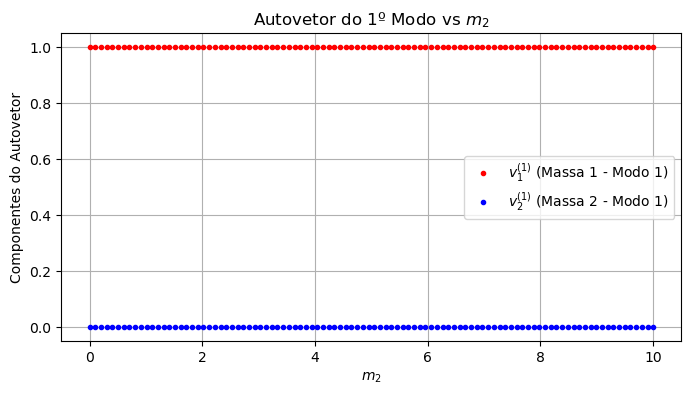

In [99]:
v_var = []
m2_values = np.linspace(0.001, 10, 100)

for m2 in m2_values:
    D = np.array([[k/m1, 0],
                  [0, k/m2]])
    _, eigvecs = np.linalg.eig(D)
    v_var.append(eigvecs)

v_var = np.array(v_var)

plt.figure(figsize=(8, 4))
plt.plot(m2_values, v_var[:, 0, 0], marker = '.', linestyle = 'none', color='r', label="$v_{1}^{(1)}$ (Massa 1 - Modo 1)")
plt.plot(m2_values, v_var[:, 0, 1], marker = '.', linestyle = 'none', color='b', label="$v_{2}^{(1)}$ (Massa 2 - Modo 1)")
plt.xlabel("$m_2$")
plt.ylabel("Componentes do Autovetor")
plt.legend()
plt.title("Autovetor do 1º Modo vs $m_2$")
plt.grid()
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
C:\Users\aragao.palha\AppData\Local\Temp\ipykernel_7800\792614438.py:9: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel("Autovalor ($\lambda$)")
C:\Users\aragao.palha\AppData\Local\Temp\ipykernel_7800\792614438.py:9: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel("Autovalor ($\lambda$)")


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (100,) and arg 1 with shape (100, 2).

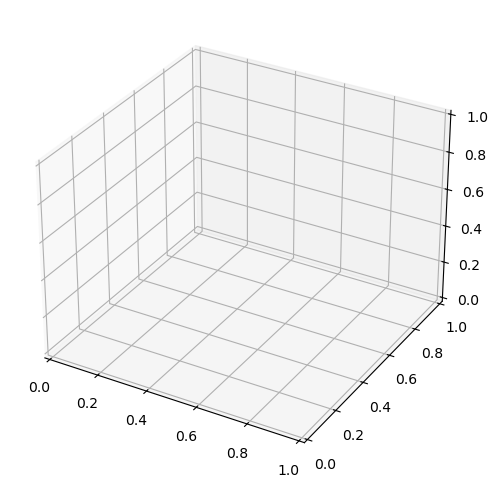

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(m2_values, v_var[:, 0], v_var[:, 0, 0], label="Modo 1")
ax.scatter(m2_values, v_var[:, 1], v_var[:, 1, 0], label="Modo 2")
ax.set_xlabel("$m_2$")
ax.set_ylabel("Autovalor ($\lambda$)")
ax.set_zlabel("Componente do Autovetor")
ax.legend()
plt.title("Relação entre $m_2$, Autovalores e Autovetores")
plt.show()

In [10]:
massas = int(input("Qual o número de massas da cadeia? "))
m_var = float(input("Qual a massa m? "))
m = np.full(massas, m_var)  # Cria um array 1D com todas as massas iguais a m_var

k1 = float(input("Qual a constante elástica k? "))

# Inicializa a matriz D corretamente
D = np.zeros((massas, massas))

# Preenche a matriz D (forma simétrica)
for i in range(massas):
    if massas == 1:
        D[i, i] = k1 / m[i]
    else:
        if i == 0:
            D[i, i] = k1 / m[i]
            D[i, i+1] = -k1 / np.sqrt(m[i] * m[i+1])  # Garante simetria
        elif i == massas - 1:
            D[i, i] = k1 / m[i]
            D[i, i-1] = -k1 / np.sqrt(m[i] * m[i-1])  # Garante simetria
        else:
            D[i, i] = 2 * k1 / m[i]
            D[i, i-1] = -k1 / np.sqrt(m[i] * m[i-1])  # Termo simétrico
            D[i, i+1] = -k1 / np.sqrt(m[i] * m[i+1])  # Termo simétrico

# Usa eigh para matrizes simétricas (mais estável)
autovalores, autovetores = eigh(D)  
#frequencias = np.sqrt(np.abs(autovalores))  # Autovalores devem ser >= 0

print(D)
print(f"Autovalores: {autovalores}")
#print(f"Frequências: {frequencias}")
print(f"Autovetores:\n{autovetores}")

[[ 0.1 -0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [-0.1  0.2 -0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.  -0.1  0.2 -0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -0.1  0.2 -0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -0.1  0.2 -0.1  0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.1  0.2 -0.1  0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.1  0.2 -0.1  0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.1  0.2 -0.1  0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -0.1  0.2 -0.1  0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -0.1  0.2 -0.1  0.   0

In [12]:
#cria a matriz nula
massas = int(input("Qual o número de massas da cadeia?"))
m = []
for i in range(int(massas)): 
    m_var = input(f"Qual a massa m{i+1}?")
    m.append(float(m_var))
m = np.array(m)
m0 = np.zeros((massas, massas))
#agora substituimos k
k1 = float(input("Qual a constante elástica k?"))
if massas == 2: 
    D = np.array([[k1/m[0], -k1/m[0]],
                  [-k1/m[1], k1/m[1]]])
else:
    D = m0
    for j in range(massas):
        # Diagonal
        Ke = K[j, j-1] if j > 0 else 0  # K_{j,j-1} (0 at boundary)
        Kd = K[j, j+1] if j < n-1 else 0  # K_{j,j+1} (0 at boundary)
        D[j, j] = (Ke + Kd) / m[j]

        # Off-diagonal elements D_{j,j±1}
        if j > 0:
            D[j, j-1] = -K[j, j-1] / m[j]  # D_{j,j-1}
        if j < n-1:
            D[j, j+1] = -K[j, j+1] / m[j]  # D_{j,j+1}

 


print(f"para {massas} massas m_i = {m} e constante elástica k={k1}, a matriz D é: \n{D}")
  


NameError: name 'n' is not defined

In [ ]:
#cria a matriz nula
massas = int(input("Qual o número de massas da cadeia?"))
m = []
for i in range(int(massas)): 
    m_var = input(f"Qual a massa m{i+1}?")
    m.append(float(m_var))
m = np.array(m)
m0 = np.zeros((massas, massas))
#agora substituimos k
k1 = float(input("Qual a constante elástica k?"))
if massas == 2: 
    D = np.array([[k1/m[0], -k1/m[0]],
                  [-k1/m[1], k1/m[1]]])
else:
    D = m0
    for k in range(n-1):
        D[k, k+1] = -k1/m[k]
        D[k+1, k] = -k1/m[k+1]

    for j in range(n):
        if j == 0 or j == n-1:
            D[j, j] = k1/m[j]
        else:
            D[j, j] = (D[j, j-1] + D[j, j+1])/m[j]
newD = D        
    
 


print(f"para {massas} massas m_i = {m} e constante elástica k={k1}, a matriz D é: \n{newD}")

para 6 massas m_i = [1. 1. 1. 1. 1. 1.] e constante elástica k=3.0, a matriz D é: 
[[ 3. -3.  0.  0.  0.  0.]
 [-3. -6. -3.  0.  0.  0.]
 [ 0. -3. -6. -3.  0.  0.]
 [ 0.  0. -3.  3.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


In [100]:

# Cria a matriz nula
massas = int(input("Qual o número de massas da cadeia? "))
m = []
for i in range(int(massas)): 
    m_var = input(f"Qual a massa m{i+1}? ")
    m.append(float(m_var))
m = np.array(m)

k1 = float(input("Qual a constante elástica k? "))

# Inicializa a matriz D com zeros
D = np.zeros((massas, massas))

# Preenche a matriz D de acordo com o sistema de massas e molas
for i in range(massas):
    if massas == 1:  # Caso especial com apenas 1 massa
        D[i, i] = k1/m[i]
    else:
        if i == 0:  # Primeira massa
            D[i, i] = k1/m[i]
            D[i, i+1] = -k1/m[i]
        elif i == massas-1:  # Última massa
            D[i, i] = k1/m[i]
            D[i, i-1] = -k1/m[i]
        else:  # Massas do meio
            D[i, i] = 2*k1/m[i]
            D[i, i-1] = -k1/m[i]
            D[i, i+1] = -k1/m[i]

print("Matriz D:")
print(D)

ValueError: could not convert string to float: ''

### Para n = 3

In [13]:
k, m1, m2, m3 = 1, 1, 1, 1 #constantes genéricas

M3 = np.vstack([np.full(n, m1),
                np.full(n, m2),
                np.full(n, m3)])

D3 = np.array([[k/m1, -k/m1, 0],
               [-k/m2, k/m2, 0],
               [0, -k/m3, k/m3]])
valor, vetor = np.linalg.eigh(D3)
print(f"Matriz D: \n{D3} \n \nFrequências: {valor} \n \nModos normais: \n{vetor}")

NameError: name 'n' is not defined

In [ ]:
M3

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

### Para n = 4

In [15]:
k, m1, m2, m3, m4 = 1, 1, 1, 1, 1 #constantes genéricas
N = 4
M4 = np.vstack([np.full(N, m1),
                np.full(N, m2),
                np.full(N, m3),
                np.full(N, m4)])

D4 = np.array([[k/m1, -k/m1,    0,      0],
               [-k/m2, 2*k/m2, -k/m2,   0],
               [0,    -k/m3,    2*k/m3, 0],
               [0,      0,     -k/m4,  k/m4]])
valor, vetor = np.linalg.eigh(D4)
print(f"Matriz D: \n{D4} \n \nFrequências: {valor} \n \nModos normais: \n{vetor}")

Matriz D: 
[[ 1. -1.  0.  0.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0. -1.  1.]] 
 
Frequências: [-9.74614466e-17  5.85786438e-01  2.00000000e+00  3.41421356e+00] 
 
Modos normais: 
[[-0.5         0.65328148  0.5        -0.27059805]
 [-0.5         0.27059805 -0.5         0.65328148]
 [-0.5        -0.27059805 -0.5        -0.65328148]
 [-0.5        -0.65328148  0.5         0.27059805]]


### Para n = 4 considerando $2^a$ vizinhança

In [16]:
k1, k2, m1, m2, m3, m4 = 1, 1, 1, 1, 1, 1 #constantes genéricas

M4 = np.vstack([np.full(N, m1),
                np.full(N, m2),
                np.full(N, m3),
                np.full(N, m4)])

D4_v = np.array([[(k1 + k2)/m1, -k1/m1,    -k2,      0],
               [-k/m2, (2*k1 + k2)/m2, -k1/m2,   -k2/m2],
               [-k2,    -k/m3,    (2*k1 + k2)/m3, -k1/m3],
               [0,      -k2/m4,     -k1/m4,  (k1 + k2)/m4]])
valor, vetor = np.linalg.eigh(D4_v)
print(f"Matriz D: \n{D4_v} \n \nFrequências: {valor} \n \nModos normais: \n{vetor}")

Matriz D: 
[[ 2. -1. -1.  0.]
 [-1.  3. -1. -1.]
 [-1. -1.  3. -1.]
 [ 0. -1. -1.  2.]] 
 
Frequências: [-9.64506253e-16  2.00000000e+00  4.00000000e+00  4.00000000e+00] 
 
Modos normais: 
[[-5.00000000e-01  7.07106781e-01  4.97655806e-01 -4.83600990e-02]
 [-5.00000000e-01 -2.91659768e-17 -5.66047314e-01 -6.55431491e-01]
 [-5.00000000e-01  3.58693823e-17 -4.29264298e-01  7.52151689e-01]
 [-5.00000000e-01 -7.07106781e-01  4.97655806e-01 -4.83600990e-02]]


## Caso generalizado: matriz $D (n \times n)$

#### Cria a matriz D

In [17]:
# Cria a matriz nula
massas = int(input("Qual o número de massas da cadeia? "))
m = []
for i in range(int(massas)): 
    m_var = input(f"Qual a massa m{i+1}? ")
    m.append(float(m_var))
m = np.array(m)

k1 = float(input("Qual a constante elástica k? "))

# Inicializa a matriz D com zeros
D = np.zeros((massas, massas))

# Preenche a matriz D de acordo com o sistema de massas e molas
for i in range(massas):
    if massas == 1:  # Caso especial com apenas 1 massa
        D[i, i] = k1/m[i]
    else:
        if i == 0:  # Primeira massa
            D[i, i] = k1/m[i]
            D[i, i+1] = -k1/m[i]
        elif i == massas-1:  # Última massa
            D[i, i] = k1/m[i]
            D[i, i-1] = -k1/m[i]
        else:  # Massas do meio
            D[i, i] = 2*k1/m[i]
            D[i, i-1] = -k1/m[i]
            D[i, i+1] = -k1/m[i]

print("Matriz D:")
print(D)

Matriz D:
[[ 0.1 -0.1  0.   0.   0. ]
 [-0.1  0.2 -0.1  0.   0. ]
 [ 0.  -0.1  0.2 -0.1  0. ]
 [ 0.   0.  -0.1  0.2 -0.1]
 [ 0.   0.   0.  -0.1  0.1]]


#### Devolve autovalores e autovetores

In [18]:
# Cria a matriz nula
massas = int(input("Qual o número de massas da cadeia? "))
m = []
for i in range(int(massas)): 
    m_var = input(f"Qual a massa m{i+1}? ")
    m.append(float(m_var))
m = np.array(m)

k1 = float(input("Qual a constante elástica k? "))

# Inicializa a matriz D com zeros
D = np.zeros((massas, massas))

# Preenche a matriz D de acordo com o sistema de massas e molas
for i in range(massas):
    if massas == 1:  # Caso especial com apenas 1 massa
        D[i, i] = k1/m[i]
    else:
        if i == 0:  # Primeira massa
            D[i, i] = k1/m[i]
            D[i, i+1] = -k1/m[i]
        elif i == massas-1:  # Última massa
            D[i, i] = k1/m[i]
            D[i, i-1] = -k1/m[i]
        else:  # Massas do meio
            D[i, i] = 2*k1/m[i]
            D[i, i-1] = -k1/m[i]
            D[i, i+1] = -k1/m[i]

autovalores, autovetores = np.linalg.eig(D)
frequencias = np.sqrt(np.abs(autovalores))
print(f"Para as massas m = {m} e constante elástica k={k1} temos:")
print(f"Autovalores: {autovalores}, frequências: {frequencias}. \nautovetores: \n{autovetores}")


Para as massas m = [1. 1. 1. 1. 1.] e constante elástica k=0.1 temos:
Autovalores: [3.61803399e-01 2.61803399e-01 1.38196601e-01 8.24104622e-18
 3.81966011e-02], frequências: [6.01500955e-01 5.11667274e-01 3.71748034e-01 2.87072225e-09
 1.95439508e-01]. 
autovetores: 
[[-1.95439508e-01 -3.71748034e-01 -5.11667274e-01 -4.47213595e-01
  -6.01500955e-01]
 [ 5.11667274e-01  6.01500955e-01  1.95439508e-01 -4.47213595e-01
  -3.71748034e-01]
 [-6.32455532e-01  6.47634819e-17  6.32455532e-01 -4.47213595e-01
   5.02103695e-17]
 [ 5.11667274e-01 -6.01500955e-01  1.95439508e-01 -4.47213595e-01
   3.71748034e-01]
 [-1.95439508e-01  3.71748034e-01 -5.11667274e-01 -4.47213595e-01
   6.01500955e-01]]


#### Para $m_i$ iguais $\forall \hspace{0.5mm} i$

In [19]:
# Cria a matriz nula
massas = int(input("Qual o número de massas da cadeia? "))
m_fixa = [] 
m_var = float(input("Qual a massa m? "))
m_fixa.append(m_var)
m = np.array([m_fixa]*massas)

k1 = float(input("Qual a constante elástica k? "))

# Inicializa a matriz D com zeros
D = np.zeros((massas, massas))

# Preenche a matriz D de acordo com o sistema de massas e molas
for i in range(massas):
    if massas == 1:  # Caso especial com apenas 1 massa
        D[i, i] = k1/m[i]
    else:
        if i == 0:  # Primeira massa
            D[i, i] = k1/m[i]
            D[i, i+1] = -k1/m[i]
        elif i == massas-1:  # Última massa
            D[i, i] = k1/m[i]
            D[i, i-1] = -k1/m[i]
        else:  # Massas do meio
            D[i, i] = 2*k1/m[i]
            D[i, i-1] = -k1/m[i]
            D[i, i+1] = -k1/m[i]

autovalores, autovetores = np.linalg.eig(D)
frequencias = np.sqrt(np.abs(autovalores))
print(f"Para as massas m = {m} e constante elástica k={k1} temos:")
print(f"Autovalores: {autovalores}, frequências: {frequencias}. \nautovetores: \n{autovetores}")

Para as massas m = [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] e constante elástica k=0.1 temos:
Autovalores: [3.90211303e-01 3.61803399e-01 3.17557050e-01 2.61803399e-01
 2.00000000e-01 1.38196601e-01 8.24429495e-02 1.16106211e-17
 9.78869674e-03 3.81966011e-02], frequências: [6.24668955e-01 6.01500955e-01 5.63522005e-01 5.11667274e-01
 4.47213595e-01 3.71748034e-01 2.87128803e-01 3.40743614e-09
 9.89378428e-02 1.95439508e-01]. 
autovetores: 
[[-6.99596196e-02 -1.38196601e-01 -2.03030724e-01  2.62865556e-01
  -3.16227766e-01  3.61803399e-01  3.98470231e-01  3.16227766e-01
   4.41707654e-01  4.25325404e-01]
 [ 2.03030724e-01  3.61803399e-01  4.41707654e-01 -4.25325404e-01
   3.16227766e-01 -1.38196601e-01  6.99596196e-02  3.16227766e-01
   3.98470231e-01  2.62865556e-01]
 [-3.16227766e-01 -4.47213595e-01 -3.16227766e-01 -9.15702738e-16
   3.16227766e-01 -4.47213595e-01 -3.16227766e-01  3.16227766e-01
   3.16227766e-01  2.47181429e-16]
 [ 3.98470231e-01  3.61803399e-01 

C:\Users\aragao.palha\AppData\Local\Temp\ipykernel_7800\2648657121.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  D[i, i] = k1/m[i]
C:\Users\aragao.palha\AppData\Local\Temp\ipykernel_7800\2648657121.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  D[i, i+1] = -k1/m[i]
C:\Users\aragao.palha\AppData\Local\Temp\ipykernel_7800\2648657121.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  D[i, i] = 2*k1/m[i]
C:\Users\aragao.palha\AppData\Local\Temp\ipykernel

In [105]:
massas = int(input("Qual o número de massas da cadeia? "))
m_var = float(input("Qual a massa m? "))
m = np.full(massas, m_var)  # Cria um array 1D com todas as massas iguais a m_var

k1 = float(input("Qual a constante elástica k? "))

# Inicializa a matriz D corretamente
D = np.zeros((massas, massas))

# Preenche a matriz D (forma simétrica)
for i in range(massas):
    if massas == 1:
        D[i, i] = k1 / m[i]
    else:
        if i == 0:
            D[i, i] = k1 / m[i]
            D[i, i+1] = -k1 / np.sqrt(m[i] * m[i+1])  # Garante simetria
        elif i == massas - 1:
            D[i, i] = k1 / m[i]
            D[i, i-1] = -k1 / np.sqrt(m[i] * m[i-1])  # Garante simetria
        else:
            D[i, i] = 2 * k1 / m[i]
            D[i, i-1] = -k1 / np.sqrt(m[i] * m[i-1])  # Termo simétrico
            D[i, i+1] = -k1 / np.sqrt(m[i] * m[i+1])  # Termo simétrico

# Usa eigh para matrizes simétricas (mais estável)
autovalores, autovetores = eigh(D)  
#frequencias = np.sqrt(np.abs(autovalores))  # Autovalores devem ser >= 0

print(f"Autovalores: {autovalores}")
#print(f"Frequências: {frequencias}")
print(f"Autovetores:\n{autovetores}")

Autovalores: [0.         0.00123307 0.00492466 0.01105203 0.01957739 0.03044819
 0.04359739 0.05894393 0.0763932  0.09583761 0.11715729 0.14022078
 0.1648859  0.19100057 0.2184038  0.24692663 0.2763932  0.30662185
 0.33742621 0.36861636 0.4        0.43138364 0.46257379 0.49337815
 0.5236068  0.55307337 0.5815962  0.60899943 0.6351141  0.65977922
 0.68284271 0.70416239 0.7236068  0.74105607 0.75640261 0.76955181
 0.78042261 0.78894797 0.79507534 0.79876693]
Autovetores:
[[ 0.15811388 -0.22343441  0.22291749 ...  0.02628216  0.01754399
  -0.00877876]
 [ 0.15811388 -0.22205686  0.21742852 ... -0.07739413 -0.05219997
   0.02628216]
 [ 0.15811388 -0.21931026  0.20658574 ...  0.12422928  0.08557062
  -0.04362352]
 ...
 [ 0.15811388  0.21931026  0.20658574 ... -0.12422928  0.08557062
   0.04362352]
 [ 0.15811388  0.22205686  0.21742852 ...  0.07739413 -0.05219997
  -0.02628216]
 [ 0.15811388  0.22343441  0.22291749 ... -0.02628216  0.01754399
   0.00877876]]


#### ignorar por enquanto

IndexError: index 2 is out of bounds for axis 1 with size 2

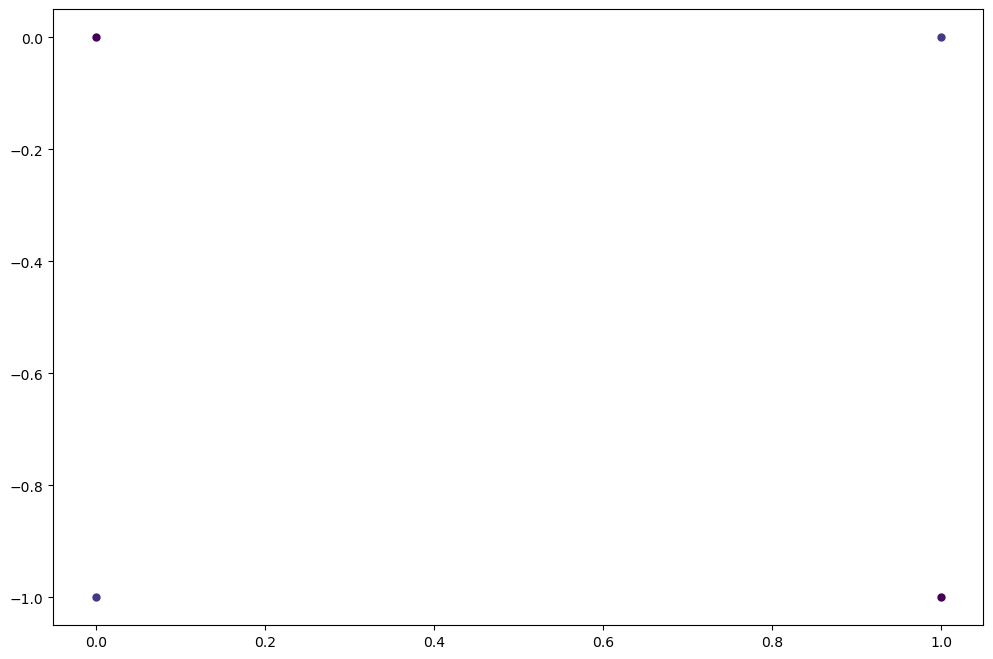

In [102]:
autovalores, autovetores = eigh(D)
frequencias = np.sqrt(np.maximum(autovalores, 0))  # Remove autovalores negativos

# Seleciona modos interessantes para plotar
modos_para_plotar = [0, 1, 2, 3, massas//2, massas-2, massas-1]  # Primeiros, médios e últimos modos

# Configuração do plot
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(modos_para_plotar)))

# Plot dos modos selecionados
for idx, modo in enumerate(modos_para_plotar):
    deslocamento = autovetores[:, modo]
    # Normaliza o deslocamento para melhor visualização
    deslocamento_normalizado = deslocamento / np.max(np.abs(deslocamento))
    
    plt.plot(deslocamento_normalizado, 
             'o' if modo < 10 else 'x-',  # Estilo diferente para modos altos
             color=colors[idx],
             linewidth=1.5 if modo < 10 else 1,
             markersize=5 if modo < 10 else 4,
             label=f'Modo {modo+1} (ω = {frequencias[modo]:.4f})')

# Configurações do gráfico
plt.xlabel('Índice do Corpo na Cadeia', fontsize=12)
plt.ylabel('Deslocamento Relativo (Normalizado)', fontsize=12)
plt.title(f'Modos Normais de Vibração para Cadeia com {massas} Massas\nk = {k}, m = 1', fontsize=14)
plt.xticks(np.arange(0, massas, max(1, massas//10)))
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adiciona informação sobre os modos
plt.annotate(f'Modo 1 (ω≈0): Translação rígida',
             xy=(0.02, 0.95), xycoords='axes fraction',
             fontsize=10, color='dimgray')

plt.tight_layout()
plt.show()

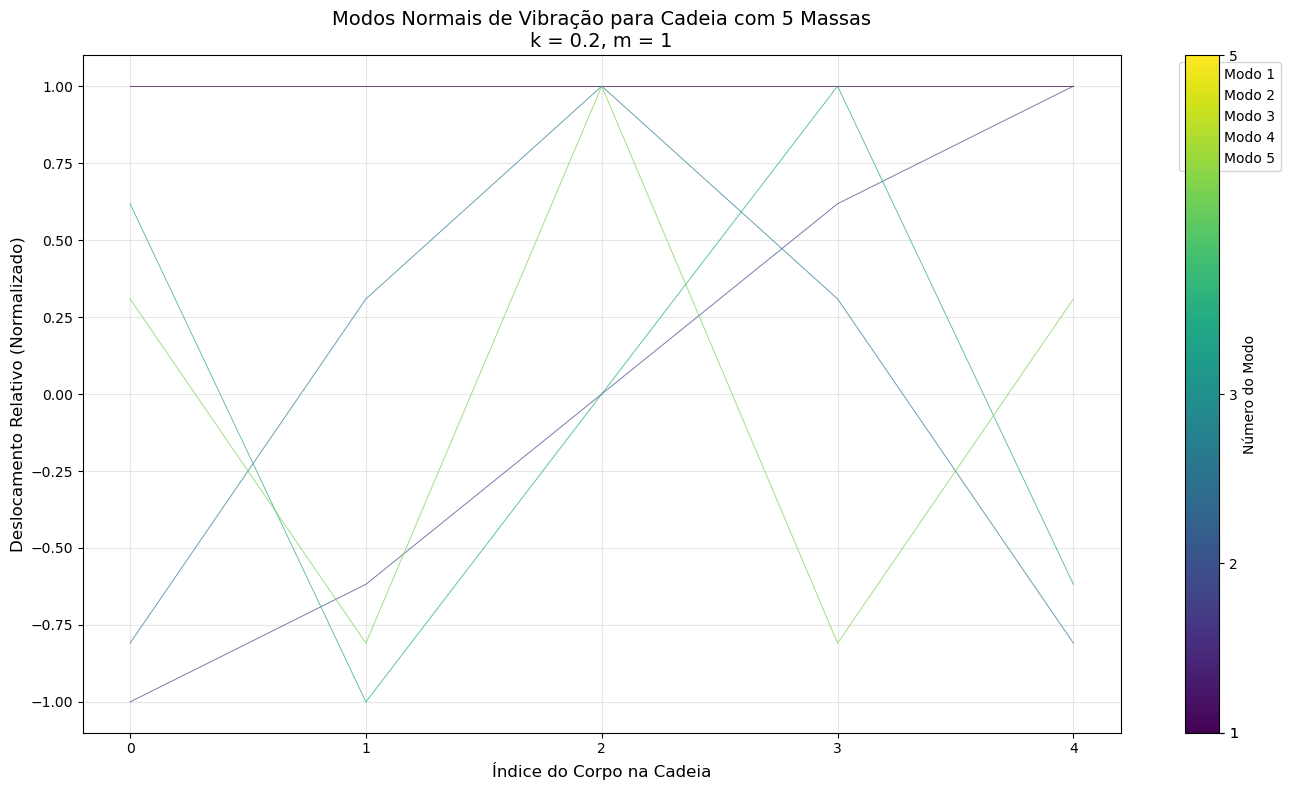

In [11]:
plt.figure(figsize=(14, 8))

# Plot de TODOS os modos normais
for modo in range(massas):
    deslocamento = autovetores[:, modo]
    deslocamento_normalizado = deslocamento / np.max(np.abs(deslocamento))
    
    # Usa cores do gradiente viridis
    color = plt.cm.viridis(modo/massas)
    
    plt.plot(deslocamento_normalizado, '-',
             color=color,
             linewidth=0.7,
             alpha=0.7,
             label=f'Modo {modo+1}' if modo < 10 else "")

# Configurações do gráfico
plt.xlabel('Índice do Corpo na Cadeia', fontsize=12)
plt.ylabel('Deslocamento Relativo (Normalizado)', fontsize=12)
plt.title(f'Modos Normais de Vibração para Cadeia com {massas} Massas\nk = {k}, m = 1', fontsize=14)
plt.xticks(np.arange(0, massas, max(1, massas//10)))
plt.grid(True, alpha=0.3)

# Mostra apenas os primeiros 10 modos na legenda para não poluir
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:10], labels[:10], bbox_to_anchor=(1.05, 1), loc='upper left')

# Adiciona barra de cores para indicar os modos
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=1, vmax=massas))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label='Número do Modo')
cbar.set_ticks([1, massas//4, massas//2, 3*massas//4, massas])
cbar.set_ticklabels([1, massas//4, massas//2, 3*massas//4, massas])

plt.tight_layout()
plt.show()

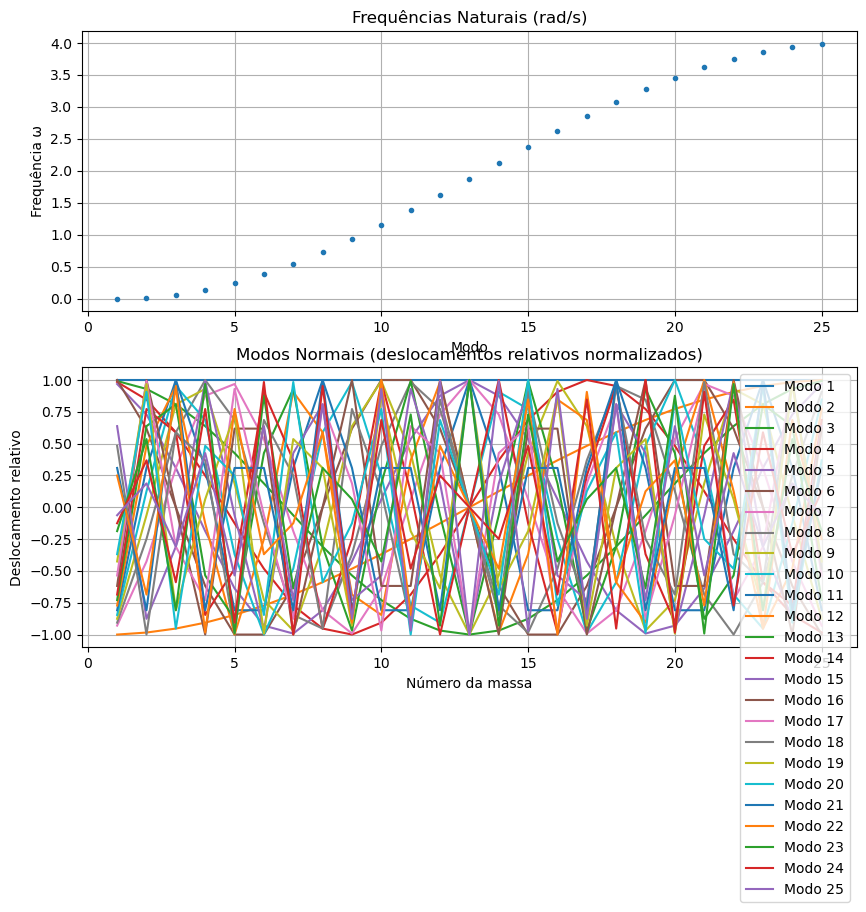

In [80]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
# Frequências naturais
axs[0].plot(range(1, massas+1), autovalores, marker='.', linestyle='')
axs[0].set_title('Frequências Naturais (rad/s)')
axs[0].set_xlabel('Modo')
axs[0].set_ylabel('Frequência ω')
axs[0].grid(True)

modos_normalizados = autovetores / np.max(np.abs(autovetores), axis=0)
for i in range(massas):
    axs[1].plot(range(1, massas+1), modos_normalizados[:, i], label=f'Modo {i+1}')
axs[1].set_title('Modos Normais (deslocamentos relativos normalizados)')
axs[1].set_xlabel('Número da massa')
axs[1].set_ylabel('Deslocamento relativo')
axs[1].legend()
axs[1].grid(True)

#### modos

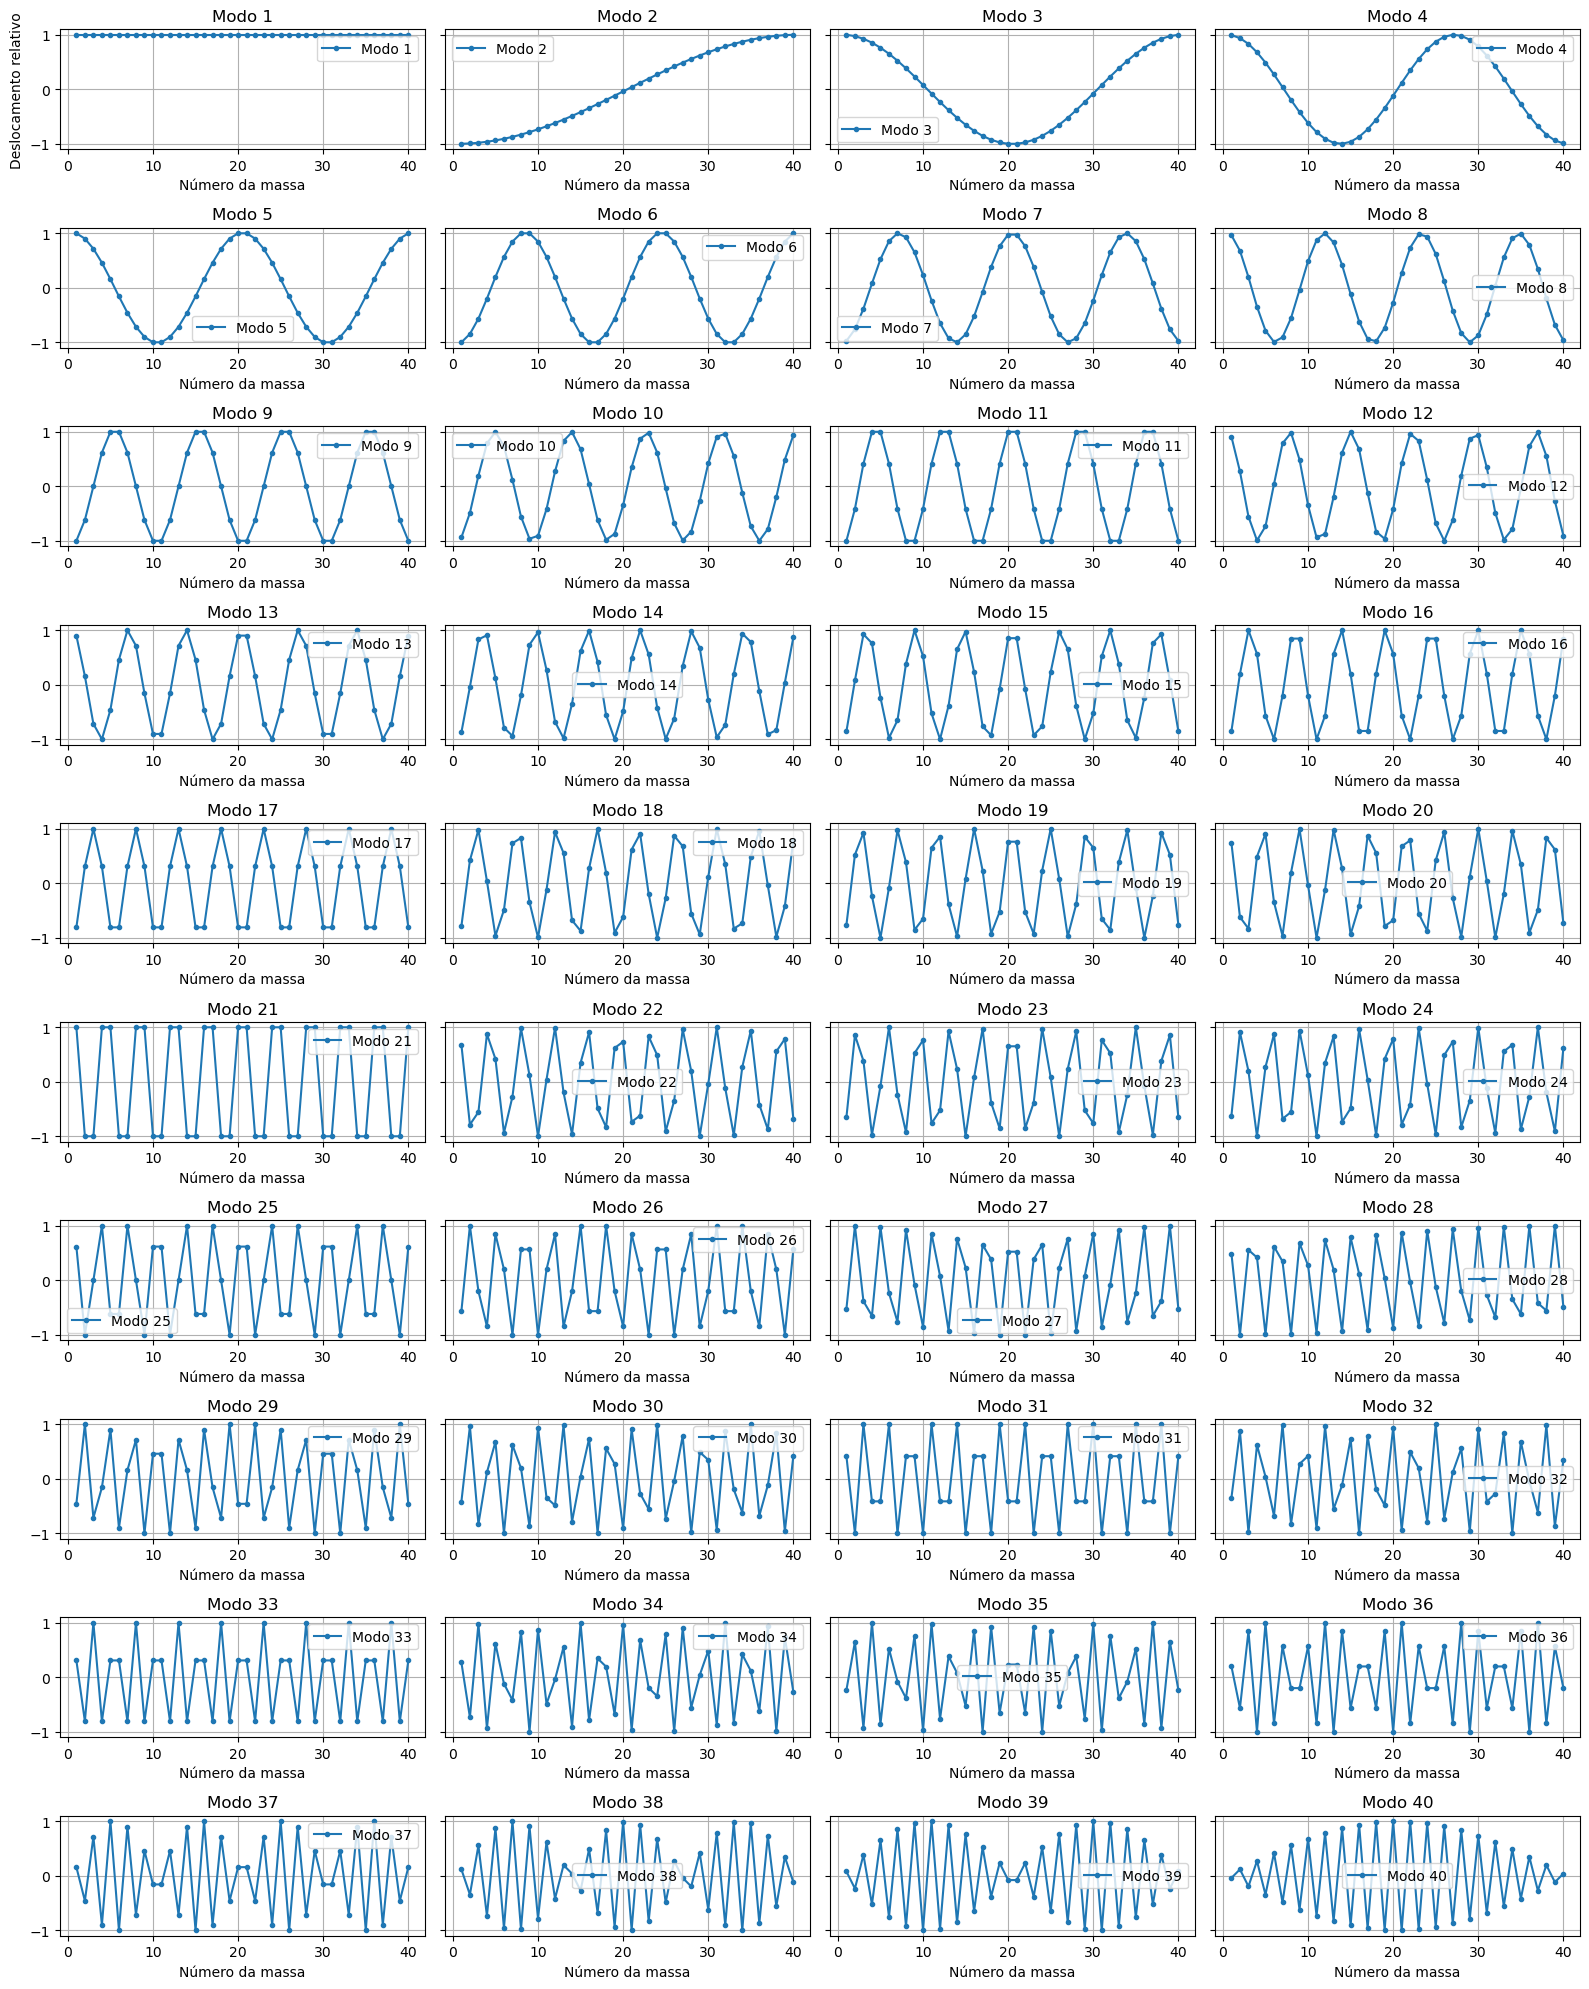

In [106]:


# Normalização dos autovetores
modos_normalizados = autovetores / np.max(np.abs(autovetores), axis=0) # serve para deixar tudo com a mesma amplitude na hora de plotar

n_cols = int(np.ceil((np.sqrt(massas))/2))  
n_rows = int(np.ceil((massas) / n_cols))

# Criar figura com subplots individuais
fig, axs = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 2*n_rows), sharey=True)  # 1 linha, N colunas
axs = np.array(axs).reshape(-1)
 

#Acos(wt)
t = np.linspace(0, 2 * np.pi, massas)
l = 1/2

# Plotar cada modo em um subplot separado
for i in range(massas):
    l +=1
    axs[i].plot(range(1, massas + 1), modos_normalizados[:, i], '.-', label=f'Modo {i + 1}')
    #axs[i].plot(np.cos(l*np.sqrt(autovalores[i])*t*np.pi) , label='Acos(wt)', linestyle='--', color='gray')
    axs[i].set_title(f'Modo {i + 1}')
    axs[i].set_xlabel('Número da massa')
    axs[i].grid(True)
    axs[i].legend()

# Configuração comum do eixo y (opcional)
axs[0].set_ylabel('Deslocamento relativo')

plt.tight_layout()  # Ajusta espaçamento entre subplots
plt.show()

### Gŕaficos

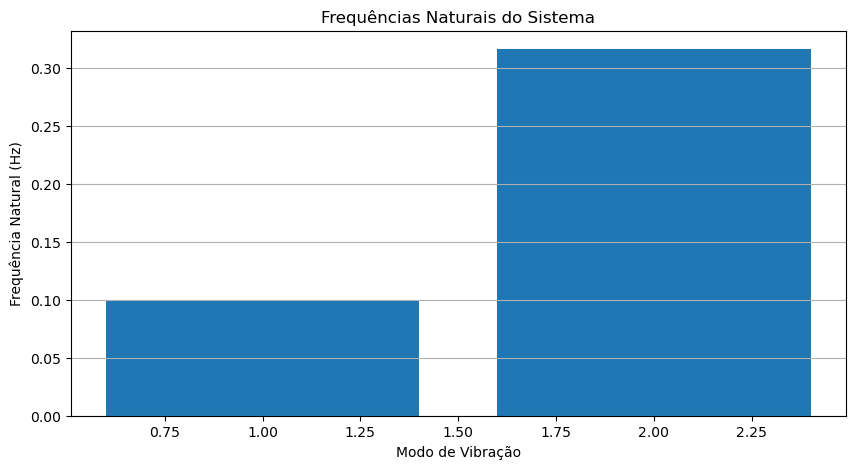

In [107]:
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(frequencias)+1), frequencias)
plt.xlabel('Modo de Vibração')
plt.ylabel('Frequência Natural (Hz)')
plt.title('Frequências Naturais do Sistema')
plt.grid(True, axis='y')
plt.show()